In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolAlign,rdFMCS

import itertools
import numpy as np
import matplotlib as mt
from matplotlib import pyplot as plt
from matplotlib import pylab

In [2]:
thq='../CD44_crystal_structures/THQ.sdf'

In [3]:
name=[]
for mol in Chem.SDMolSupplier(thq):
    if mol != None:
        name.append (mol)

RDKit ERROR: [23:19:33] Can't kekulize mol.  Unkekulized atoms: 5 10 13 14 15
RDKit ERROR: 
RDKit ERROR: [23:19:33] ERROR: Could not sanitize molecule ending on line 771
RDKit ERROR: [23:19:33] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 10 13 14 15
RDKit ERROR: 
RDKit ERROR: [23:19:33] Can't kekulize mol.  Unkekulized atoms: 4 10 12 15 16
RDKit ERROR: 
RDKit ERROR: [23:19:33] ERROR: Could not sanitize molecule ending on line 815


In [4]:
len(name)

19

In [5]:
c=itertools.combinations(name,2)
unq=list(set (c))

In [ ]:
for i,j in unq:
    res=rdFMCS.FindMCS([i,j])
    atoms_a=i.GetSubstructMatch(Chem.MolFromSmiles('C1CC2=C(CN1)C=CC=C2'))
    atoms_b=j.GetSubstructMatch(Chem.MolFromSmiles('C1CC2=C(CN1)C=CC=C2'))
    atom_map=zip(atoms_a,atoms_b)
    rmsd=rdMolAlign.AlignMol(i,j,atomMap=list(atom_map))
    print (i.GetProp('_Name').split('_')[0],' vs ',j.GetProp('_Name').split('_')[0],' : ', rmsd)
    print ('-------------')

In [6]:
x=len(name)
hmap=np.ndarray (shape=(x,x))
for i in range(len(name)):
    for j in range(len(name)):
        res=rdFMCS.FindMCS([name[i],name[j]])
        atoms_a=name[i].GetSubstructMatch(Chem.MolFromSmiles('C1CC2=C(CN1)C=CC=C2'))
        atoms_b=name[j].GetSubstructMatch(Chem.MolFromSmiles('C1CC2=C(CN1)C=CC=C2'))
        atom_map=zip(atoms_a,atoms_b)
        rmsd=rdMolAlign.AlignMol(name[i],name[j],atomMap=list(atom_map))
        hmap[i,j]=rmsd

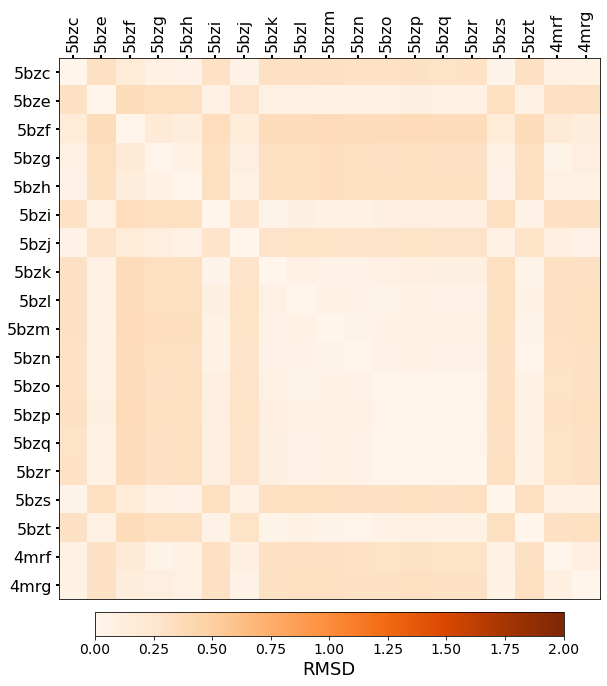

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
plt.imshow (hmap,cmap='Oranges',interpolation='nearest', vmin=0, vmax=2)
plt.xticks (range(len(name)),[i.GetProp('_Name').split('_')[0] for i in name],rotation=90,fontsize=18)
plt.yticks (range(len(name)),[i.GetProp('_Name').split('_')[0] for i in name])
ax.xaxis.tick_top()
m=plt.colorbar(shrink=0.7,orientation='horizontal',spacing='uniform',pad=0.02)
m.ax.tick_params(labelsize=14) 
m.set_label ('RMSD',size=18)
#plt.clim(0,0.25)
plt.tick_params ('both',width=2,labelsize=16)
plt.savefig('../CD44_crystal_structures/THQ_hmap_2.png',quality=95,dpi=300,format='png',transparent=False)
plt.show()